### These are simulations to test statistical tests for normality (Shapiro-Wilk and Kolmogorov–Smirnov tests) for the following conditions and their combinations:

1. Various distributions: normal distribution and not-normal distribution (exponentional, poisson etc.)
2. Various size of data (10, 100, 1000, 5000, 20000 samples)
3. Sensitivity to outliers


The goal is to benchmark tests to see if tests provide the expected results

ShapiroResult(statistic=0.8641277551651001, pvalue=0.0853390023112297)


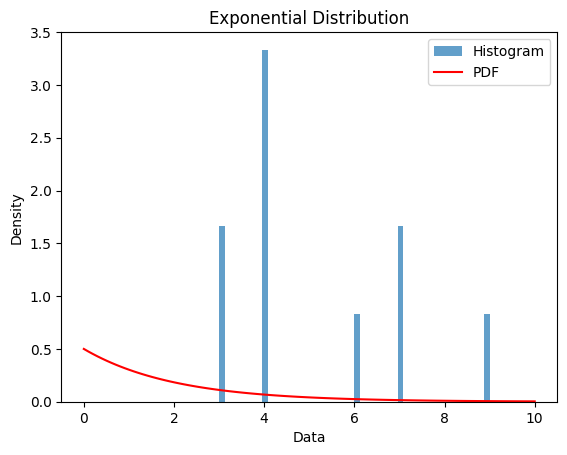

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# Set the parameters for the exponential distribution
lam = 0.5  # rate parameter
n = 10  # number of samples

# Generate samples from the exponential distribution
exp_dist = np.random.exponential(scale=1/lam, size=n)
norm_dist = np.random.normal(0, 1, 10)
poisson_dist = np.random.poisson(5, 10)

print(stats.shapiro(poisson_dist))

# Plot a histogram of the samples
plt.hist(poisson_dist, bins=50, density=True, alpha=0.7, label='Histogram')

# Plot the probability density function of the exponential distribution
t = np.linspace(0, 10, 100)
pdf = lam * np.exp(-lam * t)
plt.plot(t, pdf, 'r', label='PDF')

# Add labels and legend to the plot
plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Exponential Distribution')
plt.legend()

# Show the plot
plt.show()



In [52]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro


distributions = []

for _ in range(100):
    tmp_dist =[shapiro(np.random.exponential(scale=1/lam, size=10))[1],
                shapiro(np.random.exponential(scale=1/lam, size=100))[1],
                shapiro(np.random.exponential(scale=1/lam, size=1000))[1],
                shapiro(np.random.exponential(scale=1/lam, size=5000))[1],
                shapiro(np.random.exponential(scale=1/lam, size=20000))[1]]
    distributions.append(tmp_dist)

df = pd.DataFrame(distributions, columns = ['n10','n100','n1000', 'n5000', 'n20000'])

df[df < 0.05].count()/100

# # Plot a histogram of the samples
# plt.hist(df["n100"], bins=50, density=True, alpha=0.7, label=f'p-value significant {df["n100"][df["n100"] < 0.05].count()/100} %')

# # Plot the probability density function of the exponential distribution

# # Add labels and legend to the plot
# plt.xlabel('Data')
# plt.ylabel('Density')
# plt.title('P-value Distribution')
# plt.legend()

# # Show the plot
# plt.show()


/home/rostyslav/anaconda3/envs/analytics/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


n10       0.51
n100      1.00
n1000     1.00
n5000     1.00
n20000    1.00
dtype: float64

In [39]:
df["n10"]

0     7.888321e-04
1     2.178464e-08
2     4.273496e-05
3     3.383924e-03
4     4.011845e-04
          ...     
95    1.613016e-04
96    1.642262e-04
97    2.438319e-03
98    1.243104e-05
99    5.888577e-03
Name: n10, Length: 100, dtype: float64

In [34]:
import pandas as pd
import numpy as np

distributions = []

for _ in range(100):
    tmp_dist =[shapiro(np.concatenate((np.random.normal(0, 1, 10), [5, 1, 3, 1, 2])))[1],
                shapiro(np.concatenate((np.random.normal(0, 1, 100), [5, 1, 3, 1, 2])))[1],
                shapiro(np.concatenate((np.random.normal(0, 1, 1000), [5, 1, 3, 1, 2])))[1],
                shapiro(np.concatenate((np.random.normal(0, 1, 5000), [5, 1, 3, 1, 2])))[1],
                shapiro(np.concatenate((np.random.normal(0, 1, 20000), [5, 1, 3, 1, 2])))[1]]
    distributions.append(tmp_dist)

df = pd.DataFrame(distributions, columns = ['n10','n100','n1000', 'n5000', 'n20000'])

df[df > 0.05].count()/100

/home/rostyslav/anaconda3/envs/analytics/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


n10       0.76
n100      0.03
n1000     0.24
n5000     0.73
n20000    0.94
dtype: float64

In [35]:
import pandas as pd
import numpy as np

from scipy.stats import kstest

kstest

distributions = []

for _ in range(100):
    tmp_dist =[kstest(np.concatenate((np.random.normal(0, 1, 10), [5, 1, 3, 1, 2])), "norm")[1],
                kstest(np.concatenate((np.random.normal(0, 1, 100), [5, 1, 3, 1, 2])), "norm")[1],
                kstest(np.concatenate((np.random.normal(0, 1, 1000), [5, 1, 3, 1, 2])), "norm")[1],
                kstest(np.concatenate((np.random.normal(0, 1, 5000), [5, 1, 3, 1, 2])), "norm")[1],
                kstest(np.concatenate((np.random.normal(0, 1, 20000), [5, 1, 3, 1, 2])), "norm")[1]]
    distributions.append(tmp_dist)

df = pd.DataFrame(distributions, columns = ['n10','n100','n1000', 'n5000', 'n20000'])

df[df > 0.05].count()/100

n10       0.59
n100      0.90
n1000     0.94
n5000     0.95
n20000    0.94
dtype: float64

In [36]:
import pandas as pd
import numpy as np

from scipy.stats import kstest

kstest

distributions = []

for _ in range(100):
    tmp_dist =[kstest(np.random.exponential(scale=1/lam, size=10), "norm")[1],
                kstest(np.random.exponential(scale=1/lam, size=100), "norm")[1],
                kstest(np.random.exponential(scale=1/lam, size=1000), "norm")[1],
                kstest(np.random.exponential(scale=1/lam, size=5000), "norm")[1],
                kstest(np.random.exponential(scale=1/lam, size=20000), "norm")[1]]
    distributions.append(tmp_dist)

df = pd.DataFrame(distributions, columns = ['n10','n100','n1000', 'n5000', 'n20000'])

df[df > 0.05].count()/100

n10       0.0
n100      0.0
n1000     0.0
n5000     0.0
n20000    0.0
dtype: float64